In [4]:
import requests
import pandas as pd

# 幣安API的基本URL
base_url = "https://api.binance.com"

# 設定K線圖的參數
symbol = "BTCUSDT"
interval = "1d" # 1天的K線圖
limit = 10 # 最近10天的數據

# 組合API請求的URL
url = f"{base_url}/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}"

# 使用GET請求獲取數據
response = requests.get(url)

print(response.status_code)

# 檢查請求是否成功
if response.status_code == 200:
    # 解析JSON數據
    data = response.json()
    
    # 提取K線圖數據並創建DataFrame
    df = pd.DataFrame(data, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    
    # 將開盤時間從毫秒轉換為日期時間格式
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    
    # 儲存DataFrame為CSV文件
    df.to_csv('btcusdt_klines.csv', index=False)
    print("Data saved to btcusdt_klines.csv")
    print(df.head())
else:
    print("Failed to retrieve data.")


200
Data saved to btcusdt_klines.csv
   Open time            Open            High             Low           Close  \
0 2024-03-16  69499.84000000  70043.00000000  64780.00000000  65300.63000000   
1 2024-03-17  65300.64000000  68904.40000000  64533.00000000  68393.48000000   
2 2024-03-18  68393.47000000  68956.00000000  66565.20000000  67609.99000000   
3 2024-03-19  67610.00000000  68124.11000000  61555.00000000  61937.40000000   
4 2024-03-20  61937.41000000  68100.00000000  60775.00000000  67840.51000000   

            Volume     Close time   Quote asset volume  Number of trades  \
0   55926.95336000  1710633599999  3788544202.88485590           2729019   
1   49742.21589000  1710719999999  3322963634.24251290           2449156   
2   55691.08088000  1710806399999  3768277912.41891810           2464515   
3  101005.32487000  1710892799999  6484805948.53539280           3593832   
4   90420.58592000  1710979199999  5769770052.06258300           3549793   

  Taker buy base asset vo

/var/folders/ct/yp6fq1h14hdcbn7td3nvnh840000gr/T/ipykernel_65691/4058209572.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


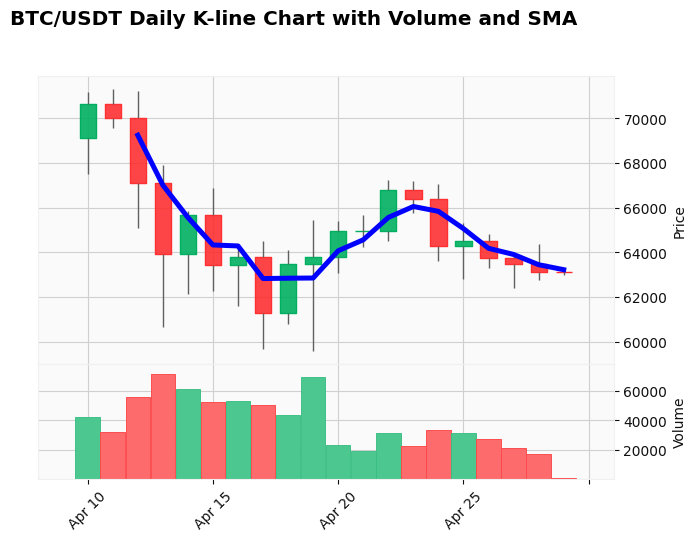

In [21]:
import pandas as pd
import mplfinance as mpf
import numpy as np

# 讀取CSV文件
df = pd.read_csv("btcusdt_klines.csv")

# Convert the 'Open time' column to datetime
df["Open time"] = pd.to_datetime(df["Open time"])

# Set 'Open time' as the index
df.set_index("Open time", inplace=True)

# Convert the 'Open', 'High', 'Low', and 'Close' columns to float
df[["Open", "High", "Low", "Close"]] = df[["Open", "High", "Low", "Close"]].astype(
    float
)
df["Volume"] = df["Volume"].astype(float)

# To drop rows where all values are missing
# df.dropna(how='all')
# Replace null values with the value from the previous row (forward fill)
df.fillna(method="ffill", inplace=True)

# Calculate the SMA
df["sma"] = df["Close"].rolling(3, min_periods=3).mean()


# Calculate the SMA using NumPy
# window_size = 3
# padded_close = np.pad(df['Close'].values, (window_size - 1, 0), mode='constant', constant_values=np.nan)
# sma = np.convolve(padded_close, np.ones(window_size), 'valid') / window_size
# df['sma'] = sma
# df.head()

# Plot the K-line chart with volume and SMA
mpf.plot(
    df,
    type="candle",
    style="yahoo",
    title="BTC/USDT Daily K-line Chart with Volume and SMA",
    volume=True,
    addplot=[mpf.make_addplot(df["sma"], color="blue", secondary_y=False)],
)

In [16]:
import requests
import pandas as pd
import mplfinance as mpf


# Your existing code to fetch and prepare the data
base_url = "https://api.binance.com"
symbol = "BTCUSDT"
interval = "1d"
limit = 20  # Increased to 12 to include 12 days of data
url = f"{base_url}/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(
        data,
        columns=[
            "Open time",
            "Open",
            "High",
            "Low",
            "Close",
            "Volume",
            "Close time",
            "Quote asset volume",
            "Number of trades",
            "Taker buy base asset volume",
            "Taker buy quote asset volume",
            "Ignore",
        ],
    )
    df["Open time"] = pd.to_datetime(df["Open time"], unit="ms")
    
    # Replace null values with the value from the previous row (forward fill)
    df.fillna(method="ffill", inplace=True)
    # Calculate the SMA
    df["sma"] = df["Close"].rolling(3, min_periods=3).mean()
    
    df.to_csv("btcusdt_klines.csv", index=False)
    print("Data saved to btcusdt_klines.csv")
else:
    print("Failed to retrieve data.")

Data saved to btcusdt_klines.csv


/var/folders/ct/yp6fq1h14hdcbn7td3nvnh840000gr/T/ipykernel_65691/1640902530.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


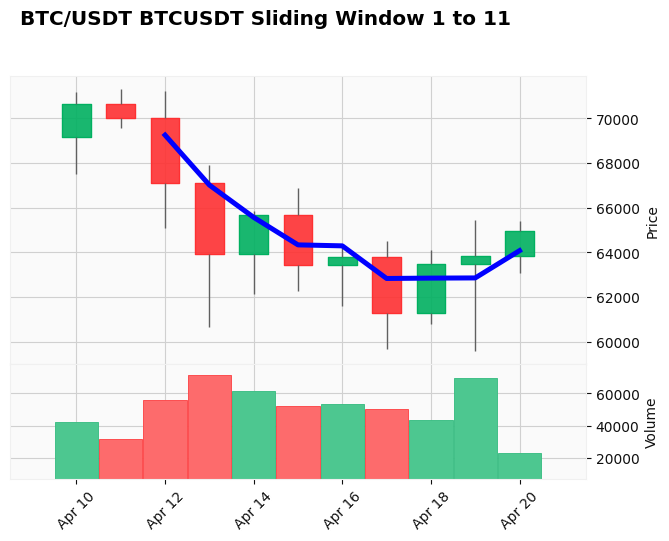

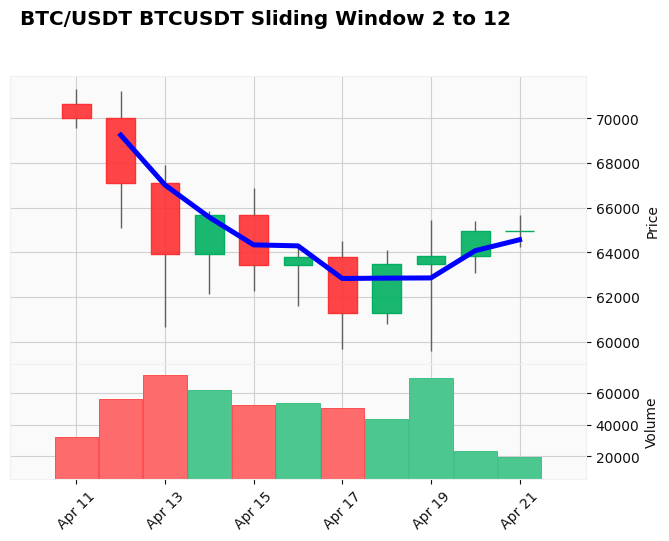

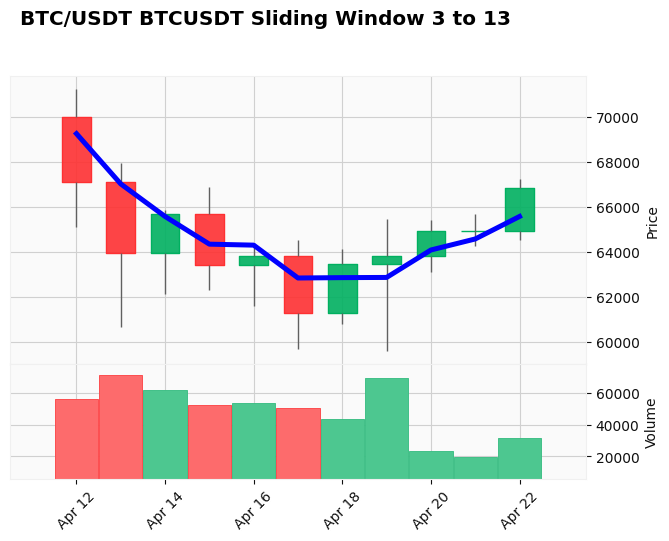

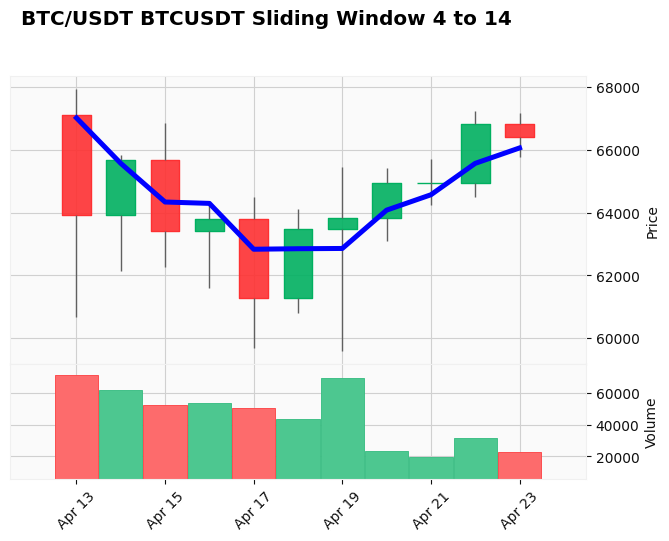

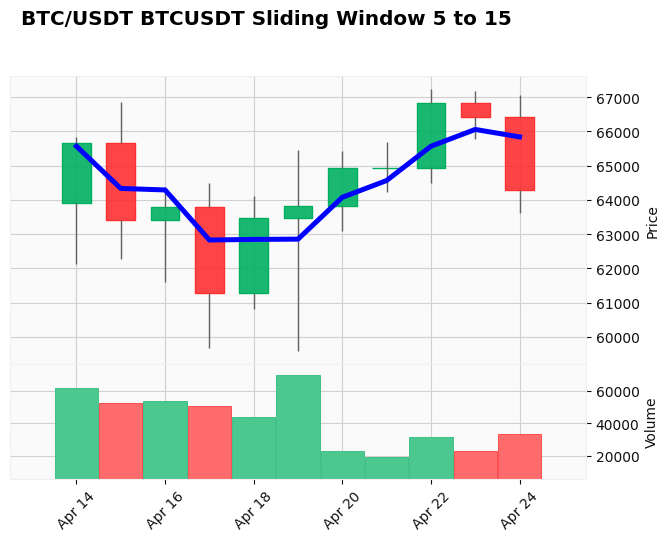

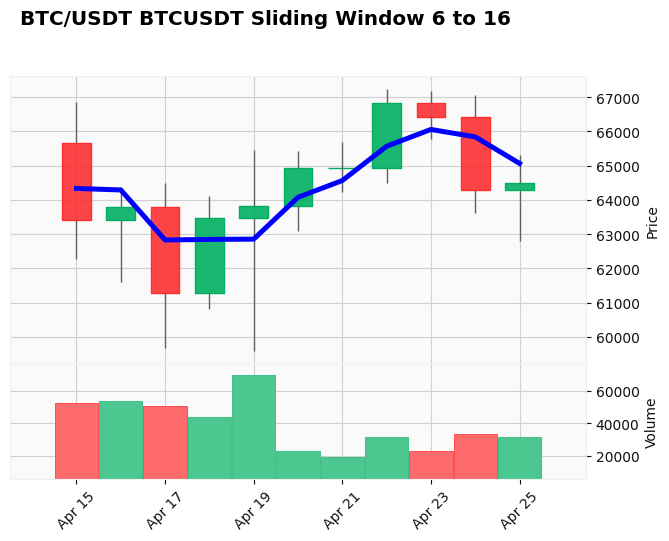

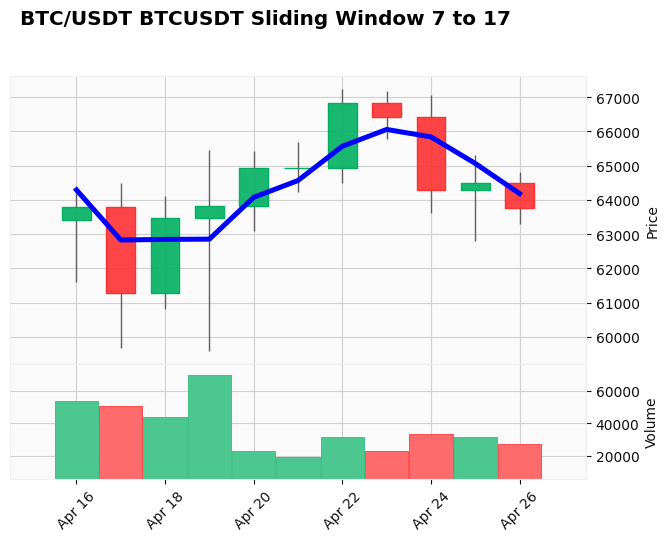

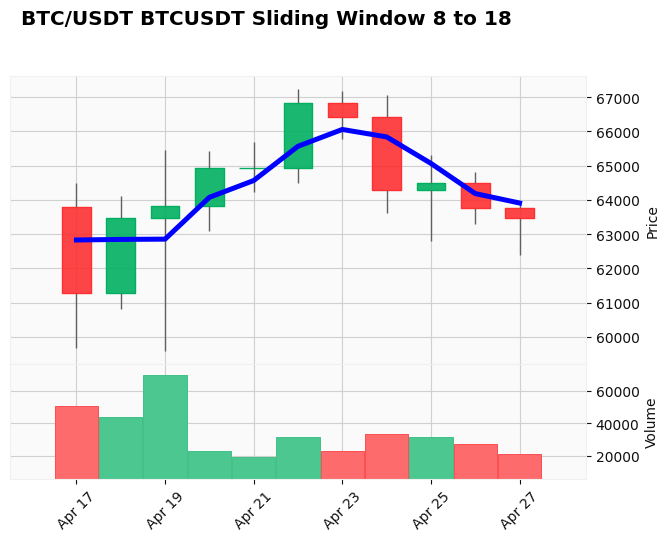

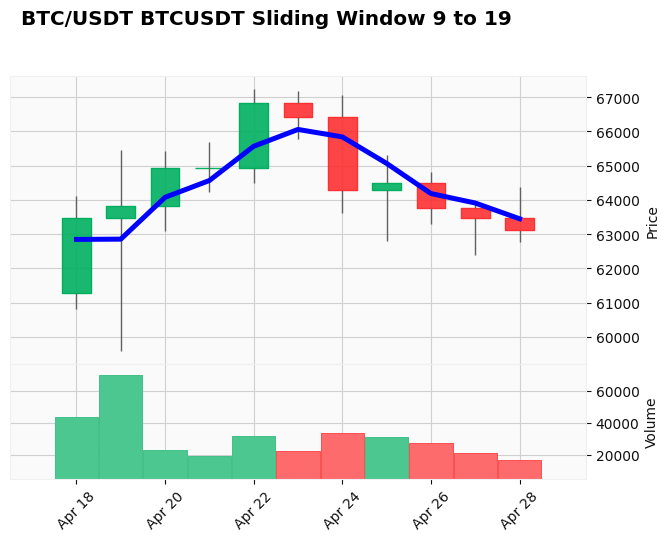

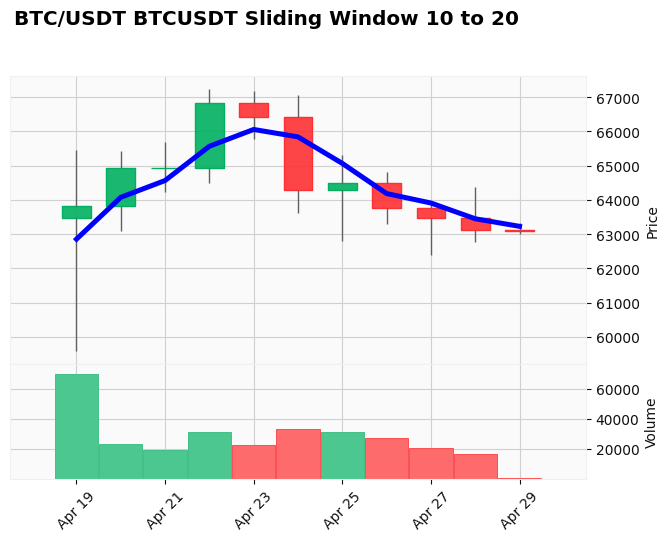

In [22]:
# Function to generate sliding window images
def generate_sliding_window_images(df, start_day, end_day, symbol):
    for i in range(start_day, end_day):
        window_df = df.iloc[i - 1 : i + 10]
        if window_df.shape[0] < 10:  # Ensure there are enough data points
            continue
        # Plot the K-line chart with volume for the window
        # Plot the K-line chart with volume and SMA
        mpf.plot(
            window_df,
            type="candle",
            style="yahoo",
            title=f"BTC/USDT {symbol} Sliding Window {i} to {i+10}",
            volume=True,
            addplot=[
                mpf.make_addplot(window_df["sma"], color="blue", secondary_y=False)
            ],
        )


# Read the CSV file
df = pd.read_csv("btcusdt_klines.csv")
df["Open time"] = pd.to_datetime(df["Open time"])
df.set_index("Open time", inplace=True)
df[["Open", "High", "Low", "Close"]] = df[["Open", "High", "Low", "Close"]].astype(
    float
)
df["Volume"] = df["Volume"].astype(float)

# df
# Generate sliding window images
generate_sliding_window_images(df, 1, 11, symbol)